<a href="https://colab.research.google.com/github/fauziw2713/First-Portofolio-EDA-Superstore/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from google.colab import files
files.upload()

Saving superstore.csv to superstore.csv


{'superstore.csv': b'Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales\r\n1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96\r\n2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94\r\n3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62\r\n4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,3331

In [3]:
df = pd.read_csv('superstore.csv', encoding="latin1")
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.describe(include = 'object')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [8]:
df = df.drop(['Row_ID', 'Country','Postal_Code'], axis = 1)

In [9]:
df[df.duplicated(keep=False)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
3405,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3406,US-2015-150119,23/04/2015,27/04/2015,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst = True, yearfirst = False)

In [11]:
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst = True, yearfirst = False)

In [12]:
year = df['Order_Date'].dt.strftime('%Y')
year.value_counts()

,count
Order_Date,
2018,3258
2017,2534
2016,2055
2015,1953


In [13]:
df.insert(15,'Year', year, True )

In [14]:
Shipping = df['Ship_Date'] - df['Order_Date']
Shipping.describe()

,0
count,9800
mean,3 days 23:04:00.979591836
std,1 days 17:59:26.617201004
min,0 days 00:00:00
25%,3 days 00:00:00
50%,4 days 00:00:00
75%,5 days 00:00:00
max,7 days 00:00:00


In [15]:
df.insert(3, 'Shipping_Time', Shipping, True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Order_ID       9800 non-null   object         
 1   Order_Date     9800 non-null   datetime64[ns] 
 2   Ship_Date      9800 non-null   datetime64[ns] 
 3   Shipping_Time  9800 non-null   timedelta64[ns]
 4   Ship_Mode      9800 non-null   object         
 5   Customer_ID    9800 non-null   object         
 6   Customer_Name  9800 non-null   object         
 7   Segment        9800 non-null   object         
 8   City           9800 non-null   object         
 9   State          9800 non-null   object         
 10  Region         9800 non-null   object         
 11  Product_ID     9800 non-null   object         
 12  Category       9800 non-null   object         
 13  Sub_Category   9800 non-null   object         
 14  Product_Name   9800 non-null   object         
 15  Sale

In [17]:
df.isna().sum()

,0
Order_ID,0
Order_Date,0
Ship_Date,0
Shipping_Time,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
City,0
State,0


In [18]:
df.loc[df.duplicated()]

,Order_ID,Order_Date,Ship_Date,Shipping_Time,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year
3406,US-2015-150119,2015-04-23,2015-04-27,4 days,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015


In [19]:
df[df['Order_ID'] == 'US-2015-150119']

,Order_ID,Order_Date,Ship_Date,Shipping_Time,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year
3405,US-2015-150119,2015-04-23,2015-04-27,4 days,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015
3406,US-2015-150119,2015-04-23,2015-04-27,4 days,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015
3407,US-2015-150119,2015-04-23,2015-04-27,4 days,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,7.488,2015
3408,US-2015-150119,2015-04-23,2015-04-27,4 days,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,East,FUR-FU-10002191,Furniture,Furnishings,G.E. Halogen Desk Lamp Bulbs,22.336,2015


In [20]:
df = df.drop_duplicates().copy()

In [21]:
df.reset_index()
df.head()

,Order_ID,Order_Date,Ship_Date,Shipping_Time,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year
0,CA-2017-152156,2017-11-08,2017-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,CA-2017-152156,2017-11-08,2017-11-11,3 days,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,CA-2017-138688,2017-06-12,2017-06-16,4 days,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,US-2016-108966,2016-10-11,2016-10-18,7 days,Standard Class,SO-20335,Sean O Donnel,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,US-2016-108966,2016-10-11,2016-10-18,7 days,Standard Class,SO-20335,Sean O Donnel,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2016


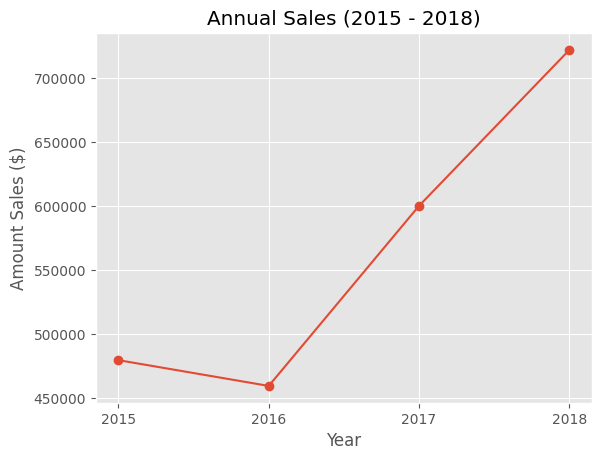

In [22]:
pd.to_numeric(df['Year'])
annual = df.groupby(['Year'])['Sales'].sum().reset_index()

plt.plot(annual['Year'], annual['Sales'], marker = 'o')

plt.title('Annual Sales (2015 - 2018)')
plt.xlabel('Year')
plt.ylabel('Amount Sales ($)')

plt.show()

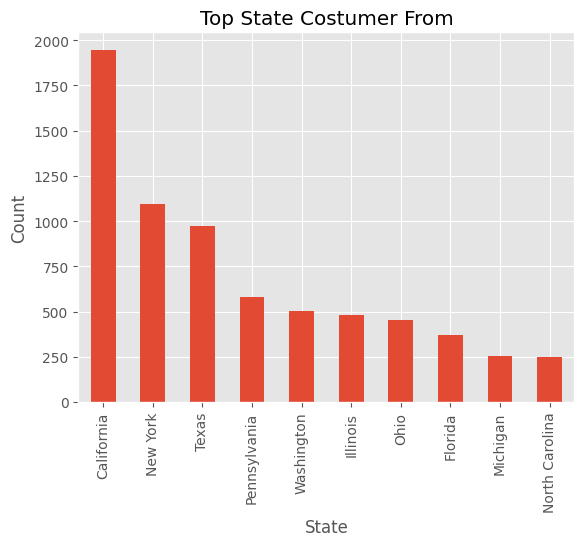

In [23]:
ax = df['State'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top State Costumer From')

ax.set_xlabel('State')
ax.set_ylabel('Count')

plt.show()

Text(0.5, 0, 'Sales ($)')

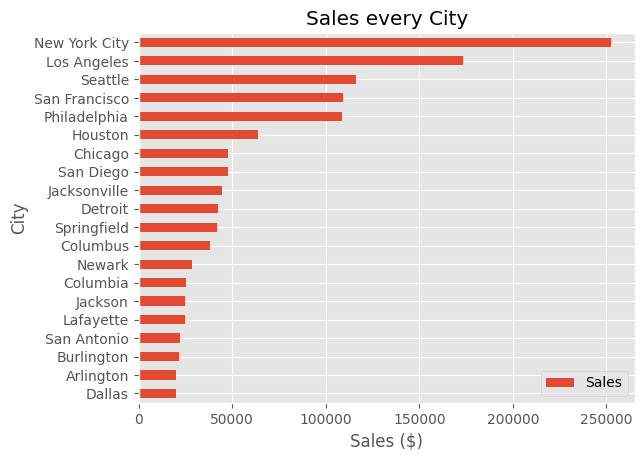

In [24]:
ax = df.groupby(['City'])['Sales'].sum().reset_index() \
  .nlargest(20, 'Sales') \
  .plot(kind = 'barh', x = 'City', y = 'Sales',
        title = 'Sales every City')

ax.invert_yaxis()
ax.set_xlabel('Sales ($)')

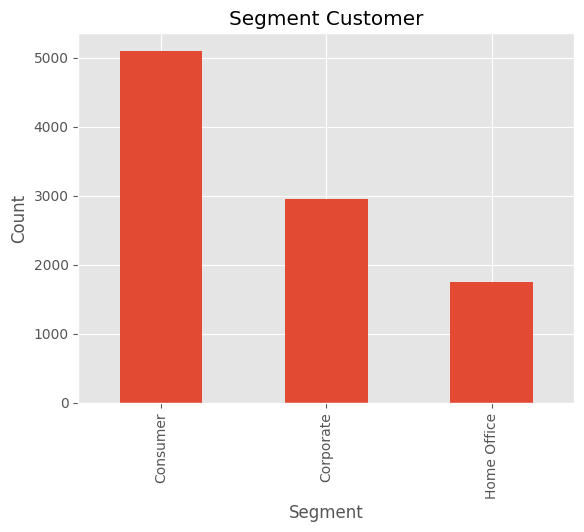

In [25]:
ax = df['Segment'].value_counts() \
    .plot(kind = 'bar', title = 'Segment Customer')

ax.set_xlabel('Segment')
ax.set_ylabel('Count')

plt.show()

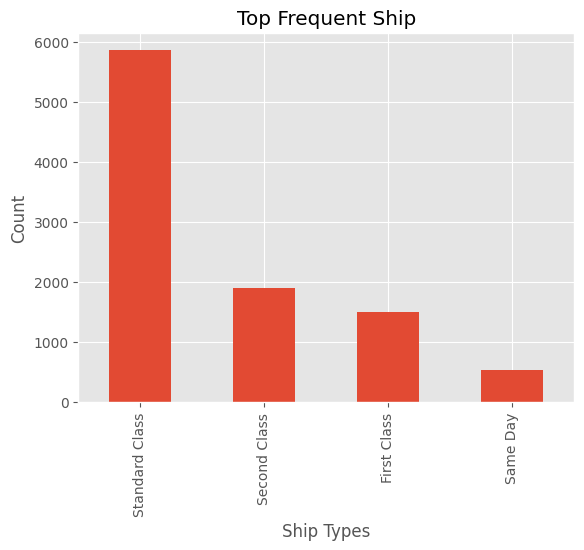

In [26]:
ax = df['Ship_Mode'].value_counts() \
    .plot(kind = 'bar', title = 'Top Frequent Ship')

ax.set_xlabel('Ship Types')
ax.set_ylabel('Count')

plt.show()

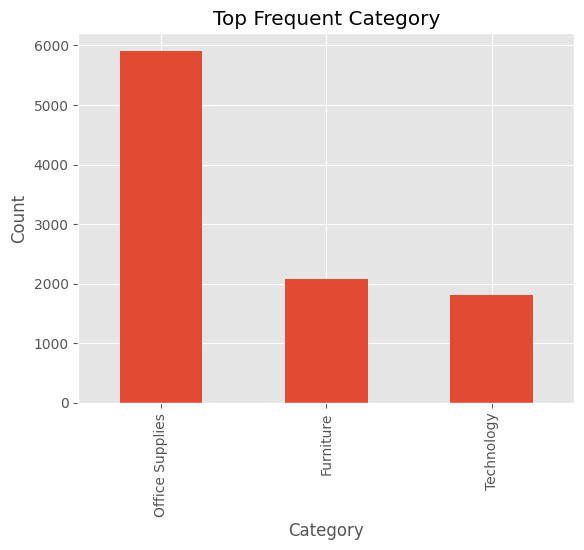

In [27]:
ax = df['Category'].value_counts() \
    .plot(kind = 'bar', title = 'Top Frequent Category')

ax.set_xlabel('Category')
ax.set_ylabel('Count')

plt.show()

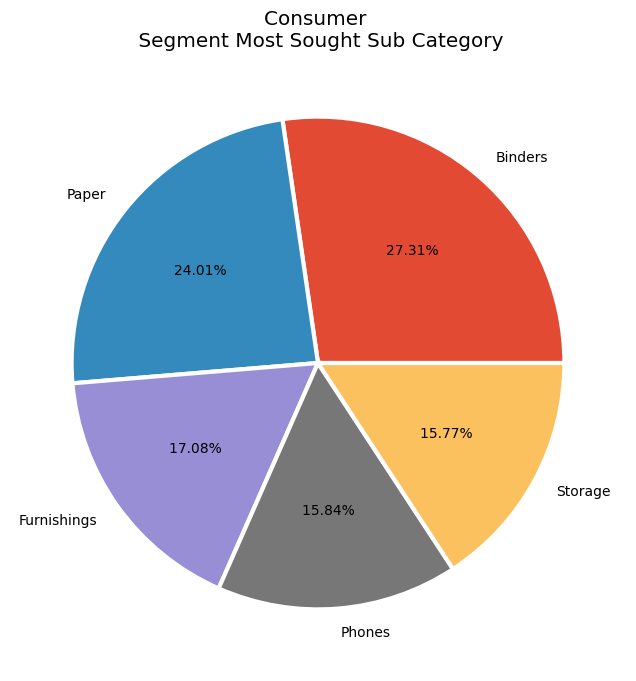

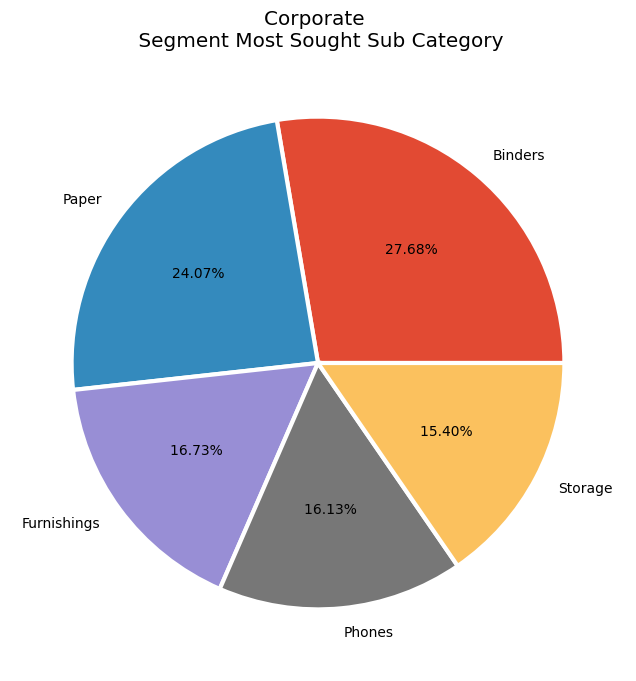

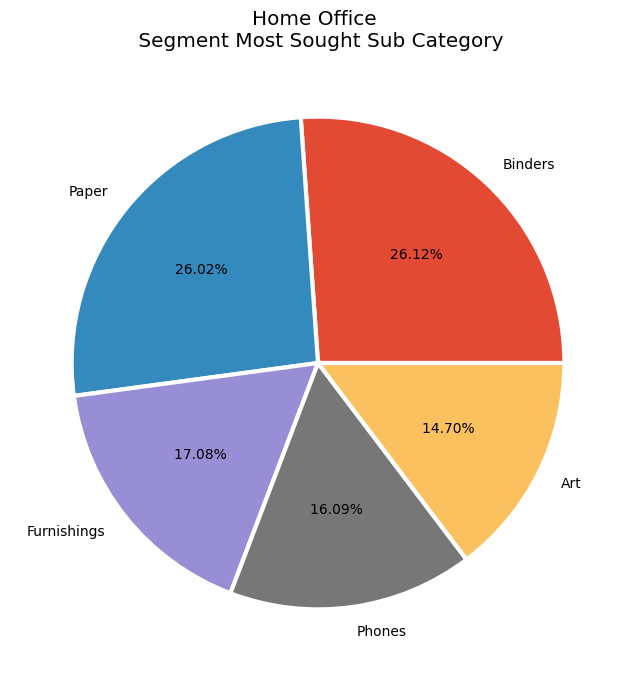

In [28]:
Segment = ['Consumer', 'Corporate', 'Home Office']

for i in (Segment):
  plt.figure(figsize = (10,8))
  Category_Segment = df[df['Segment'] == i].groupby(['Sub_Category'])['Segment'] \
  .count().reset_index() \
  .nlargest(5, 'Segment')

  plt.pie(Category_Segment['Segment'], labels = Category_Segment['Sub_Category'],
          wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
          autopct = lambda p:'{:.2f}% '.format(p, (p/100)*Category_Segment['Segment'].count()))

  plt.title(f'{i} \n Segment Most Sought Sub Category' )
  plt.show()



Text(0.5, 1.0, 'Sales Category')

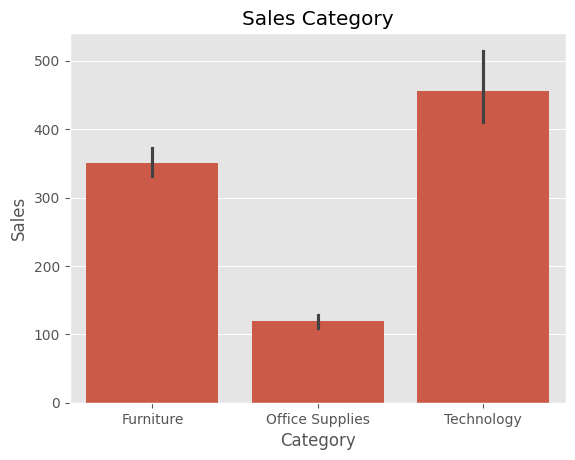

In [29]:
sns.barplot(x='Category', y='Sales', data=df)

plt.title('Sales Category')

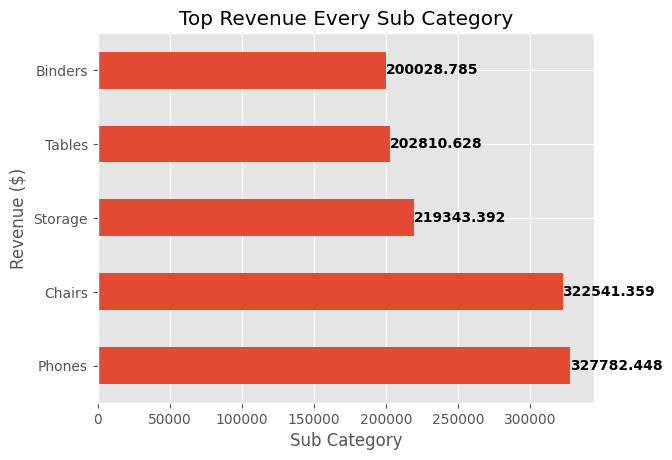

In [30]:
Revenue_sp = df.groupby(['Sub_Category'])['Sales'].sum().reset_index().nlargest(5, 'Sales')
ax = Revenue_sp\
    .plot(x = 'Sub_Category', kind = 'barh',
          title = 'Top Revenue Every Sub Category')

for i, v in enumerate(Revenue_sp['Sales']):
  ax.text(v , i, str(v), color='black', fontweight='bold', verticalalignment='center')


ax.set_xlabel('Sub Category')
ax.set_ylabel('Revenue ($)')
ax.legend().remove()

plt.show()

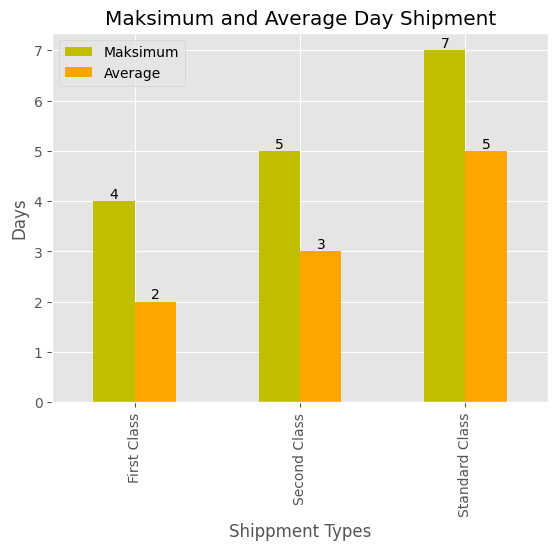

In [31]:
Day_Shipment = df[df['Ship_Mode'] != 'Same Day'] \
  .groupby(['Ship_Mode'])['Shipping_Time'].agg(['max', 'mean'])\
  .reset_index()

col = ['mean', 'max']

for i in (col):
  Day_Shipment[i] = Day_Shipment[i].dt.days

colors = ['y', 'orange', 'green']
ax = Day_Shipment.plot(x = 'Ship_Mode',
                  kind = 'bar',
                  title = 'Maksimum and Average Day Shipment',
                  color = colors)

for container in ax.containers:
  ax.bar_label(container, label_type = 'edge')

ax.set_xlabel('Shippment Types')
ax.set_ylabel('Days')
ax.legend(['Maksimum', 'Average'])
plt.show()

<Figure size 1000x800 with 0 Axes>

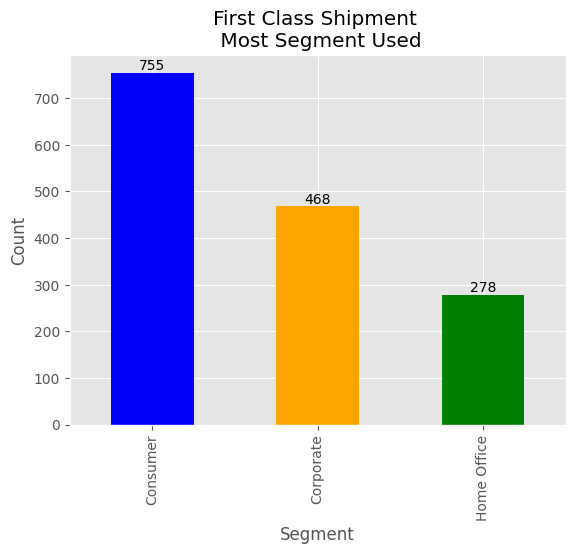

<Figure size 1000x800 with 0 Axes>

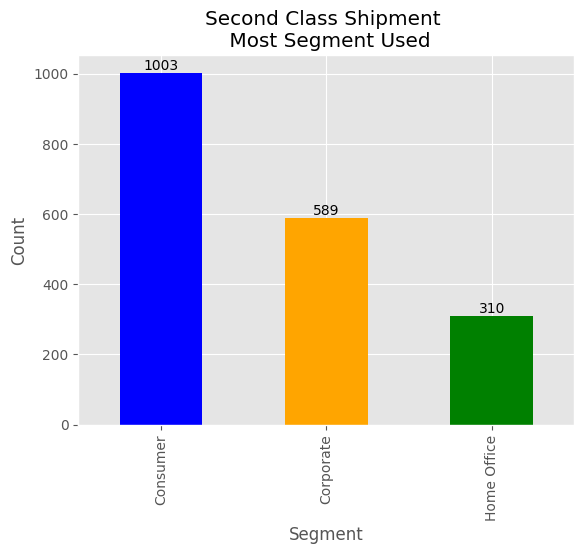

<Figure size 1000x800 with 0 Axes>

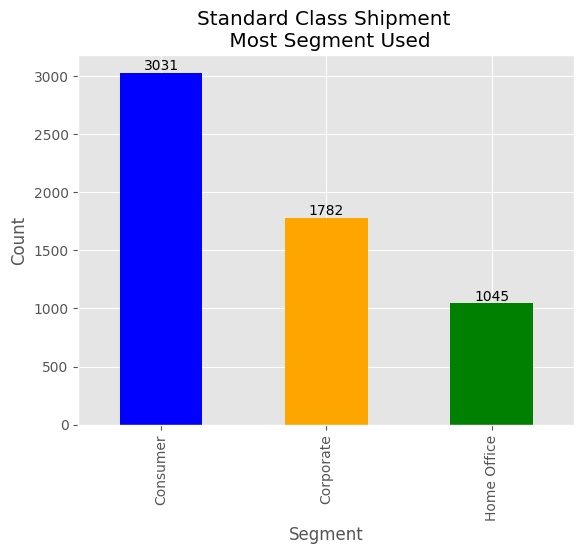

<Figure size 1000x800 with 0 Axes>

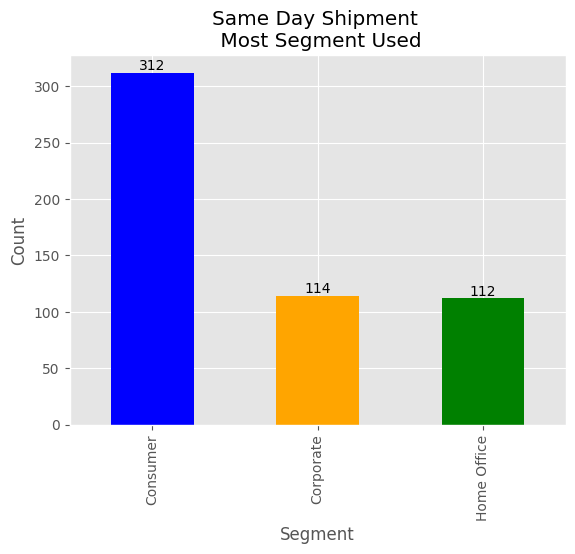

In [32]:
Ship = ['First Class', 'Second Class', 'Standard Class', 'Same Day']
colors = ['blue', 'orange', 'green']
for i in (Ship):
  plt.figure(figsize = (10,8))
  Shipment_Segment = df[df['Ship_Mode'] == i].groupby(['Segment'])['Ship_Mode'] \
  .count().reset_index()

  ax = Shipment_Segment.plot(x = 'Segment', y = 'Ship_Mode', kind = 'bar', color = colors)

  for container in ax.containers:
    ax.bar_label(container, label_type = 'edge',)


  plt.title(f'{i} Shipment \n Most Segment Used' )
  ax.set_xlabel('Segment')
  ax.legend().remove()
  ax.set_ylabel('Count')

  plt.show()

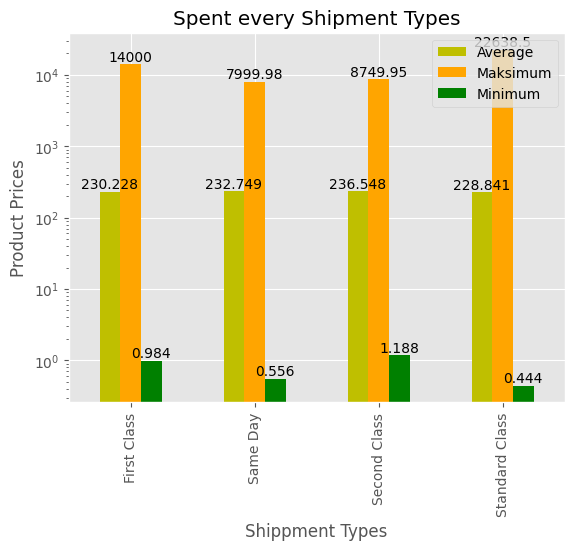

In [33]:
SpentShip = df.groupby(['Ship_Mode'])['Sales'].agg(['mean', 'max', 'min'])\
  .reset_index()

colors = ['y', 'orange', 'green']
ax = SpentShip.plot(x = 'Ship_Mode',
                  kind = 'bar',
                  logy = True,
                  title = 'Spent every Shipment Types',
                  color = colors)

for container in ax.containers:
  ax.bar_label(container, label_type = 'edge')

ax.set_xlabel('Shippment Types')
ax.set_ylabel('Product Prices')
ax.legend(['Average', 'Maksimum', 'Minimum'])
plt.show()

In [34]:
df.sort_values('Order_Date')

,Order_ID,Order_Date,Ship_Date,Shipping_Time,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Year
7980,CA-2015-103800,2015-01-03,2015-01-07,4 days,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2 X 4 Forms/...",16.448,2015
739,CA-2015-112326,2015-01-04,2015-01-08,4 days,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015
740,CA-2015-112326,2015-01-04,2015-01-08,4 days,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015
741,CA-2015-112326,2015-01-04,2015-01-08,4 days,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015
1759,CA-2015-141817,2015-01-05,2015-01-12,7 days,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,2019-01-03,4 days,Standard Class,PO-18865,Patrick O Donnel,Consumer,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018
5091,CA-2018-156720,2018-12-30,2019-01-03,4 days,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,2018
645,CA-2018-126221,2018-12-30,2019-01-05,6 days,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018
907,CA-2018-143259,2018-12-30,2019-01-03,4 days,Standard Class,PO-18865,Patrick O Donnel,Consumer,New York City,New York,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,2018


In [35]:
Repeat_Order = df[['Order_ID', 'Customer_ID']]
Repeat_Order = Repeat_Order.drop_duplicates(subset='Order_ID').reset_index(drop=True)
Repeat_Order

,Order_ID,Customer_ID
0,CA-2017-152156,CG-12520
1,CA-2017-138688,DV-13045
2,US-2016-108966,SO-20335
3,CA-2015-115812,BH-11710
4,CA-2018-114412,AA-10480
...,...,...
4917,US-2015-114377,BG-11035
4918,CA-2018-144491,CJ-12010
4919,CA-2015-127166,KH-16360
4920,CA-2017-125920,SH-19975


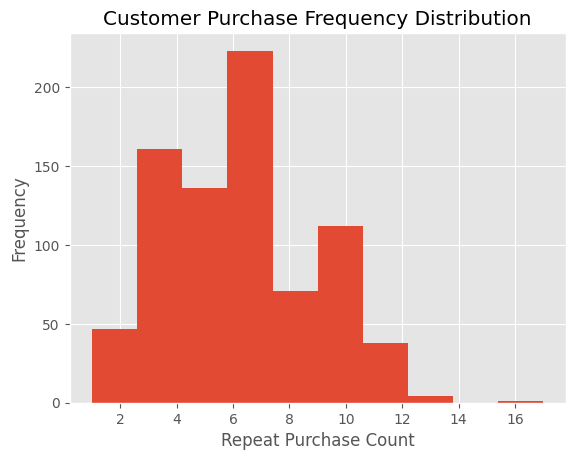

In [36]:
Repeat_Order = Repeat_Order.groupby(['Customer_ID'])['Order_ID'].count().reset_index()

Repeat_Order.plot(kind = 'hist', title = 'Customer Purchase Frequency Distribution')

plt.xlabel('Repeat Purchase Count')
plt.legend().remove()

plt.show()

Most customer tend to have a repeat purchase around 6. That sugessts that many customer make 6 repeat order. The number of customers decreases as the repeat purchase count increases, indicating fewer customers make high numbers of repeat orders. For example, the counts drop significantly after 10 repeat orders. Counts between 4 and 10 show moderate customer repeat purchase activity, with many customers making between 4 and 8 repeat orders.

In [37]:
Repeat = df.groupby(['Customer_ID'])['Sales'].sum().reset_index()
Repeat

,Customer_ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156
...,...,...
788,XP-21865,2374.658
789,YC-21895,5454.350
790,YS-21880,6720.444
791,ZC-21910,8025.707


In [38]:
Repeat_Sales = pd.merge(Repeat_Order, Repeat,
                        left_on = 'Customer_ID',
                        right_on = 'Customer_ID',
                        how = 'left')

Repeat_Sales['Order_ID'] = np.where(Repeat_Sales['Order_ID'] == 1, 'First-time Customer', 'Repeat Order')

Repeat_Sales = Repeat_Sales.rename(columns \
                                   ={'Order_ID' : 'Type_Customer'})

Text(0, 0.5, 'Sales($)')

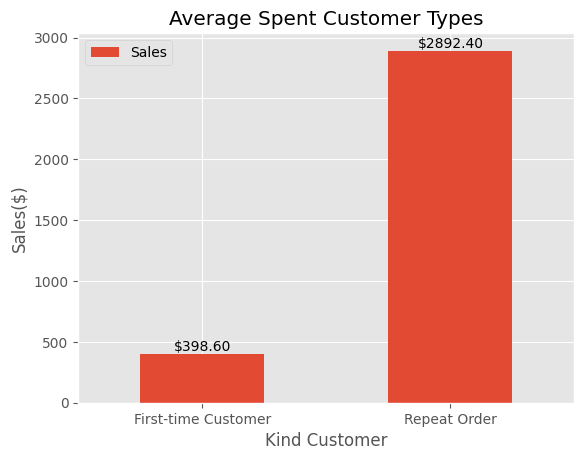

In [39]:
ax = Repeat_Sales.groupby(['Type_Customer'])['Sales'].mean().reset_index() \
  .plot(kind = 'bar', x = 'Type_Customer', rot = 0)

for container in ax.containers:
  ax.bar_label(container,
               labels=[f'${v:.2f}' for v in container.datavalues],
               label_type = 'edge')

plt.title('Average Spent Customer Types')
plt.xlabel('Kind Customer')
plt.ylabel('Sales($)')

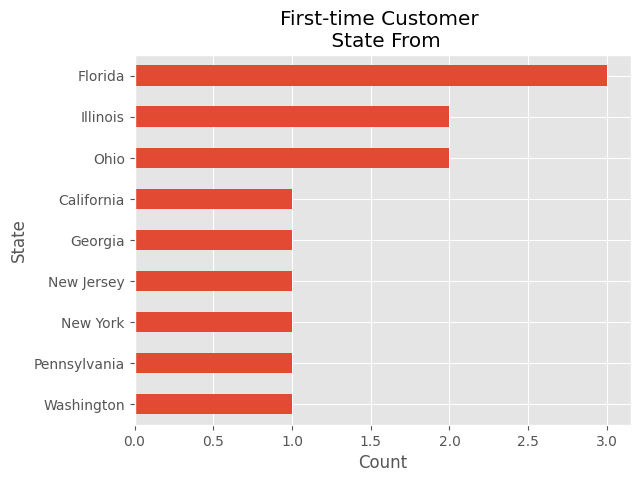

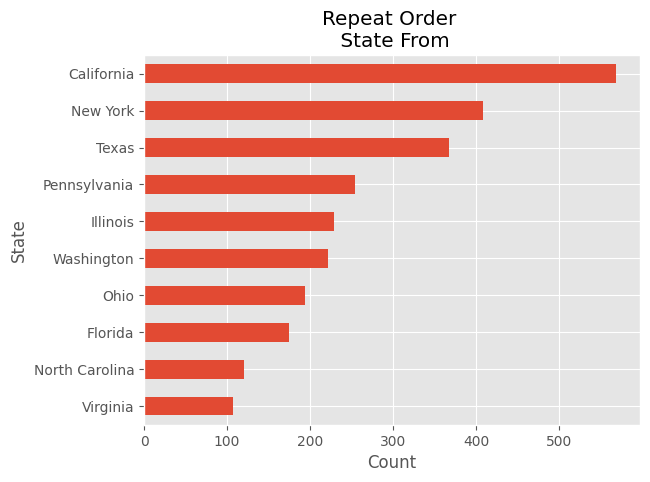

In [45]:
Repeat_City = pd.merge(Repeat_Sales, df[['Customer_ID', 'State']],
                        left_on = 'Customer_ID',
                        right_on = 'Customer_ID',
                        how = 'left')


Repeat_City = Repeat_City.drop_duplicates().reset_index()

types = ['First-time Customer','Repeat Order']
for i in (types):
  ax = Repeat_City[Repeat_City['Type_Customer'] == i].groupby('State')['Customer_ID'].count()\
      .reset_index()\
      .nlargest(10, 'Customer_ID')\
      .plot(kind = 'barh', x = 'State')\

  ax.set_title(f'{i} \n State From')
  ax.invert_yaxis()
  ax.set_xlabel('Count')
  ax.legend().remove()


- California and New York are state with a very strong repeat order base tend to have fewer new customer.
-Illinois and Ohio show a balance between new and repeat customers
- Florida excels at attracting new customers, although its repeat order count is not as high as other states.

In [41]:
Repeat_City[Repeat_City['Type_Customer'] == 'Repeat Order'].groupby('State')['Customer_ID'].count()\
  .reset_index()\
  .nlargest(10, 'Customer_ID')

,State,Customer_ID
3,California,569
30,New York,408
41,Texas,367
36,Pennsylvania,254
11,Illinois,229
45,Washington,222
33,Ohio,194
8,Florida,175
31,North Carolina,120
44,Virginia,107


In [42]:
First_Time = df.groupby(['Customer_ID'])['Order_Date'].min().reset_index().sort_values('Order_Date')

First_Time = pd.merge(df, First_Time, left_on = ['Customer_ID', 'Order_Date'],
                      right_on = ['Customer_ID', 'Order_Date'], how = 'inner')

In [46]:
First_Time.groupby(['Customer_ID'])['Sales'].sum()\
  .reset_index()

,Customer_ID,Sales
0,AA-10315,726.548
1,AA-10375,16.520
2,AA-10480,27.460
3,AA-10645,1106.770
4,AB-10015,12.624
...,...,...
788,XP-21865,708.616
789,YC-21895,3116.490
790,YS-21880,465.180
791,ZC-21910,1549.770


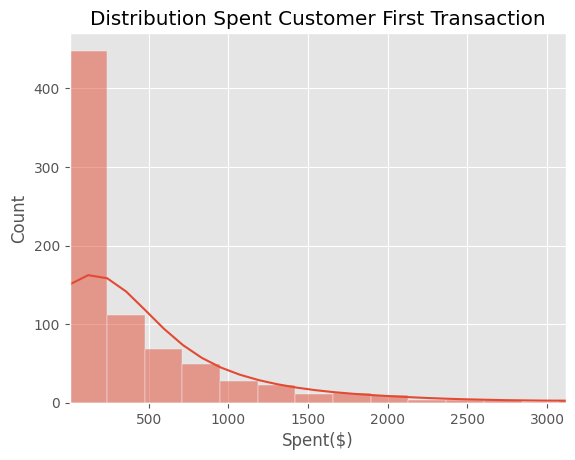

In [48]:
dist_first = First_Time.groupby(['Customer_ID'])['Sales'].sum()\
  .reset_index()

low = dist_first['Sales'].quantile(0.01)
max = dist_first['Sales'].quantile(0.95)

sns.histplot(dist_first['Sales'], bins = 100, kde = True)
plt.xlim(low, 3117)
plt.title('Distribution Spent Customer First Transaction')
plt.xlabel('Spent($)')

plt.show()

The distribution above shows that most customers spend around $250 on their first transaction. The number of customers decreases as spending on the first transaction increases, which means that fewer customers spend large amounts of money on the first transaction

Text(0.5, 0, 'Sales($)')

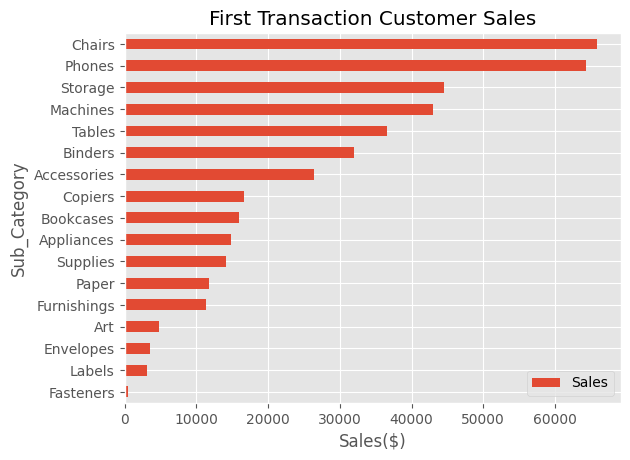

In [44]:
First_Time.groupby(['Sub_Category'])['Sales'].sum()\
    .reset_index()\
    .sort_values('Sales')\
    .plot(kind = 'barh', x = 'Sub_Category',
          title = 'First Transaction Customer Sales')

plt.xlabel('Sales($)')